# Расстояние от можества точек до функции #

Рассмотрим множество точек $A_1=(x_1,y_1), \dots A_n=(x_n, y_n)$ и функцию $y=f(x)$.

Для каждой точки $A_i=(x_i,y_i)$ найдем величину $r_i = |f(x_i)-y_i|$, т.е. расстояние от точки до функции по вертикали.

Расстоянием (среднеквадратичной ошибкой) от множества точек $A_1, \dots, A_n$ до функции $y=f(x)$ назовем величину:
$$
R = \sqrt{\frac{1}{n}\sum_{i=1}^n r_i^2} = \sqrt{\frac{1}{n}\sum_{i=1}^n (f(x_i) - y_i)^2}
$$

Если функция $f(x)$ -- является линейной, т.е. $f(x) = a_1x + a_0$, то формула приобретает вид:
$$
R = \sqrt{\frac{1}{n}\sum_{i=1}^n (a_1x_i + a_0 - y_i)^2}
$$

При фиксированных точках $A_1, \dots, A_n$, наc будет интересовать поиск функции такой $f(x)$, что величина $R$ была бы минимальной.

Пример вычисления $R$.

R = 20.75572210259137


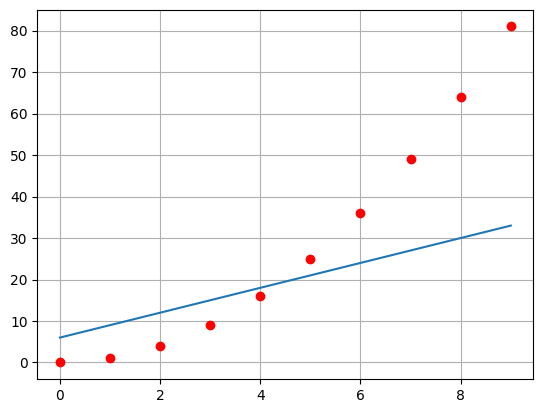

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

n = 10
X = np.arange(n)
Y = np.array([i**2 for i in range(n)])

A = np.array([6,3])

def getDistance(X,Y,A):
    R = 0
    for i in range(len(X)):
        r = A[1]*X[i]+A[0]-Y[i]
        R += r*r
    return math.sqrt(R / len(X))


print('R =', getDistance(X,Y,A))

linsp  = np.linspace(X.min(), X.max())
f = np.poly1d(np.flip(A)) # Создаем полином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика
plt.plot(linsp,fun);
plt.plot(X,Y, 'ro');
plt.grid(True);



# Задание

Далее идут 3 задания. Количество баллов равно количеству заданий.

### Задание 1 ###

Реализуйте функцию getDistance для полинома произвольной степени $d$

0


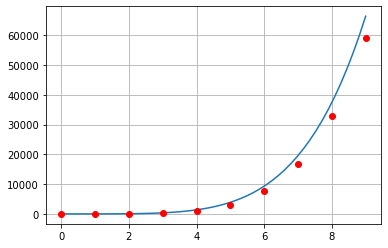

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
d = 5
X = np.arange(n)
Y = np.array([i**d for i in range(n)])
A = np.ones(d+1) #Коэффициенты полинома степени d равны 1, но можно поменять

def getDistance(X,Y,A):
    R = 0
    # ¯\_(ツ)_/¯
    return R

print(getDistance(X,Y,A))

linsp  = np.linspace(X.min(), X.max())
f = np.poly1d(np.flip(A)) # Создаем полином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика
plt.plot(linsp,fun);
plt.plot(X,Y, 'ro');
plt.grid(True);

## Метод наименьших квадратов

http://setosa.io/ev/ordinary-least-squares-regression/

Рассмотрим четыре точки $(0, -1)$, $(0,1)$, $(3,2)$ и $(3,4)$. Очевидно, что эти точки не лежат на одной прямой, тем не менее попытаемся найти прямую вида $y = kx + l$, которая проходила бы через все эти точки.

Запишем сисему:
$$
\left\{
\begin{matrix}
k \cdot 0 + l = -1 \\
k \cdot 0 + l = 1 \\
k \cdot 3 + l = 2 \\
k \cdot 3 + l = 4 \\
\end{matrix}
\right.
$$

Или в матричном виде:
$$
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Или в общем виде:
$$
AX=B
$$

Оказывается, что "решение" данной системы методом наименьших квадратов может быть найдено, если данное равенство умножить слева на $A^t$, т.е.
$$
A^tAX=A^tB
$$

В нашем случае мы получаем:
$$
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Умножаем матрицы:

$$
\begin{pmatrix}
18 & 6\\
6 & 4
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
18 \\
6 \\
\end{pmatrix}
$$

Откуда получаем решение $k = 1$, $l=0$ системы и искомую прямую
$$
y = 1 \cdot x + 0.
$$

Коэффициенты полинома: [1. 0.]


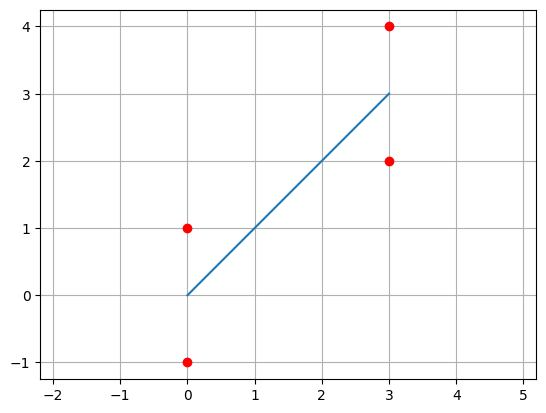

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # Печать чисел "в простой форме" без 'e'


def get_poly(X, Y):
    A = np.vstack([X, np.ones(len(X))]).T
    P = A.T @ A
    Q = A.T @ Y
    R = np.linalg.solve(P,Q)

    print('Коэффициенты полинома:', R)
    f = np.poly1d(R) # Создаем полином при помощи встроенной функции np.poly1d
    return f


def plot_picture(X, Y, f):
    plt.plot(X,Y,'ro');
    linsp = np.linspace(min(X), max(X))
    fun = [f(x) for x in linsp] # Создаем точки для построения графика
    plt.plot(linsp,fun);
    plt.axis('equal');
    plt.grid(True)

X = np.array([0, 0, 3, 3])
Y = np.array([-1, 1, 4, 2])
f = get_poly(X,Y)
plot_picture(X, Y, f)


### Задание 2 ###

При помощи метода наименьших квадратов найти функцию вида
$$
y = a_2x^2 + a_1x + a_0,
$$
которая наиболее близко располагается между пяти заданных точек.

In [1]:
def get_poly(X, Y):

    #A = ... Тут Ваш код

    P = A.T @ A
    Q = A.T @ Y
    R = np.linalg.solve(P,Q)

    print('Коэффициенты полинома:', R)
    f = np.poly1d(R) # Создаем полином при помощи встроенной функции np.poly1d
    return f


def plot_picture(X, Y, f):
    plt.plot(X,Y,'ro');
    linsp = np.linspace(min(X), max(X))
    fun = [f(x) for x in linsp] # Создаем точки для построения графика
    plt.plot(linsp,fun);
    plt.axis('equal');
    plt.grid(True)

X = np.array([0, 0, 3, 3, 5])
Y = np.array([-1, 1, 4, 2, 2])
f = get_poly(X,Y)
plot_picture(X, Y, f)

NameError: name 'np' is not defined

### Задание 3 ###
Реализуйте метод наименьших квадратов для произвольного многочлена степени $d$ и произвольного множества точке, мощности $n$.
Постройте последовательно графики данных многочленов для $d=1,2, \dots, n-1$

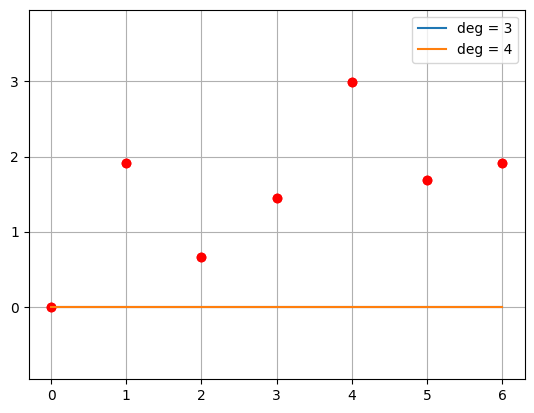

In [ ]:
def get_poly(X, Y, d):

    #A = ... Тут Ваш код

    P = A.T @ A
    Q = A.T @ Y
    R = np.linalg.solve(P,Q)

    print('Коэффициенты полинома:', R)
    f = np.poly1d(R) # Создаем полином при помощи встроенной функции np.poly1d
    return f


def plot_picture(X, Y, f, d):
    plt.plot(X,Y,'ro');
    linsp = np.linspace(min(X), max(X))
    fun = [f(x) for x in linsp] # Создаем точки для построения графика
    plt.plot(linsp, fun, label=f"deg = {d}");
    plt.axis('equal');
    plt.grid(True)
    plt.legend();

n = 7
d = 3
X = np.arange(n)
Y = np.sin(2*X) + X**0.5
f = get_poly(X, Y, d)
plot_picture(X, Y, f, d)